거래량 총량: 75859
      연도   거래량
0   2009  7208
1   2010  3846
2   2011  4084
3   2012  2601
4   2013  4752
5   2014  6025
6   2015  6862
7   2016  7548
8   2017  7782
9   2018  5130
10  2019  5168
11  2020  5907
12  2021  2259
13  2022   987
14  2023  2613
15  2024  3087


,시군구,계약년월,거래량,연도
29960,경기도 성남시 분당구 구미동,2009-01-01,98,2009
29961,경기도 성남시 분당구 구미동,2009-02-01,120,2009
29962,경기도 성남시 분당구 구미동,2009-03-01,104,2009
29963,경기도 성남시 분당구 구미동,2009-04-01,150,2009
29964,경기도 성남시 분당구 구미동,2009-05-01,72,2009


(1521, 4)


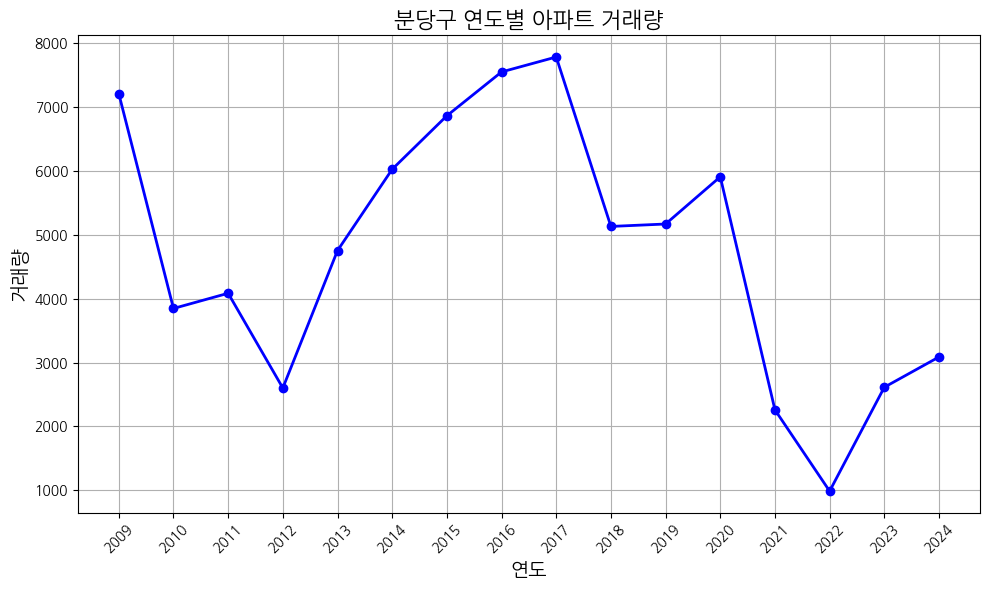

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 폰트 설정 (NanumGothic 사용)
font_path = '/Users/ihyeonglae/NewTownInsight/아파트 실거래가/NanumGothic.ttf'
fontprop = FontProperties(fname=font_path)


# CSV 파일 불러오기
df = pd.read_csv('/Users/ihyeonglae/NewTownInsight/아파트 실거래가/apt_price.csv',
                 encoding='UTF-8',
                 header=0)
df = df.drop(columns=['Unnamed: 0'])

# 필요한 컬럼만 선택
df = df[['시군구', '계약년월', '거래금액(만원)']]

# '계약년월'을 날짜 형식으로 변환
df['계약년월'] = pd.to_datetime(df['계약년월'], format='%Y%m')

# '시군구'와 '계약년월' 별로 그룹화하여 거래 건수 세기
count_by_bundang = df.groupby(['시군구', '계약년월']).size().reset_index(name='거래량')

# 필터링할 지역 리스트 설정
target_list = [
    '경기도 성남시 분당구 야탑동',
    '경기도 성남시 분당구 이매동',
    '경기도 성남시 분당구 서현동',
    '경기도 성남시 분당구 분당동',
    '경기도 성남시 분당구 수내동',
    '경기도 성남시 분당구 정자동',
    '경기도 성남시 분당구 금곡동',
    '경기도 성남시 분당구 구미동',
]


# target_list에 포함된 데이터만 필터링
count_by_bundang = count_by_bundang[count_by_bundang['시군구'].isin(target_list)]

# 2009년 이후 데이터만 필터링
count_by_bundang = count_by_bundang[count_by_bundang['계약년월'] >= '2009-01-01']

# **거래량 총량 계산**
total_transactions = count_by_bundang['거래량'].sum()
print("거래량 총량:", total_transactions)

# '계약년월'에서 연도 추출하여 '연도' 컬럼 생성
count_by_bundang['연도'] = count_by_bundang['계약년월'].dt.year

# 연도별 그룹화하여 거래량 합계 계산
annual_transactions = count_by_bundang.groupby('연도')['거래량'].sum().reset_index()

# 결과 출력
print(annual_transactions)


# 결과 확인
display(count_by_bundang.head())
print(count_by_bundang.shape)

# 그래프 크기 설정
plt.figure(figsize=(10, 6))


# 선 그래프 생성 (연도별 거래량)
plt.plot(annual_transactions['연도'], annual_transactions['거래량'], 
         color='blue', marker='o', linestyle='-', linewidth=2)

# 그래프 꾸미기
plt.xlabel('연도', fontproperties=fontprop, fontsize=14)
plt.ylabel('거래량', fontproperties=fontprop, fontsize=14)
plt.title('분당구 연도별 아파트 거래량', fontproperties=fontprop, fontsize=16)
plt.xticks(annual_transactions['연도'], fontproperties=fontprop, rotation=45)
plt.yticks(fontproperties=fontprop)
plt.grid(True)  # 격자 표시
plt.tight_layout()

# 그래프 출력
plt.show()




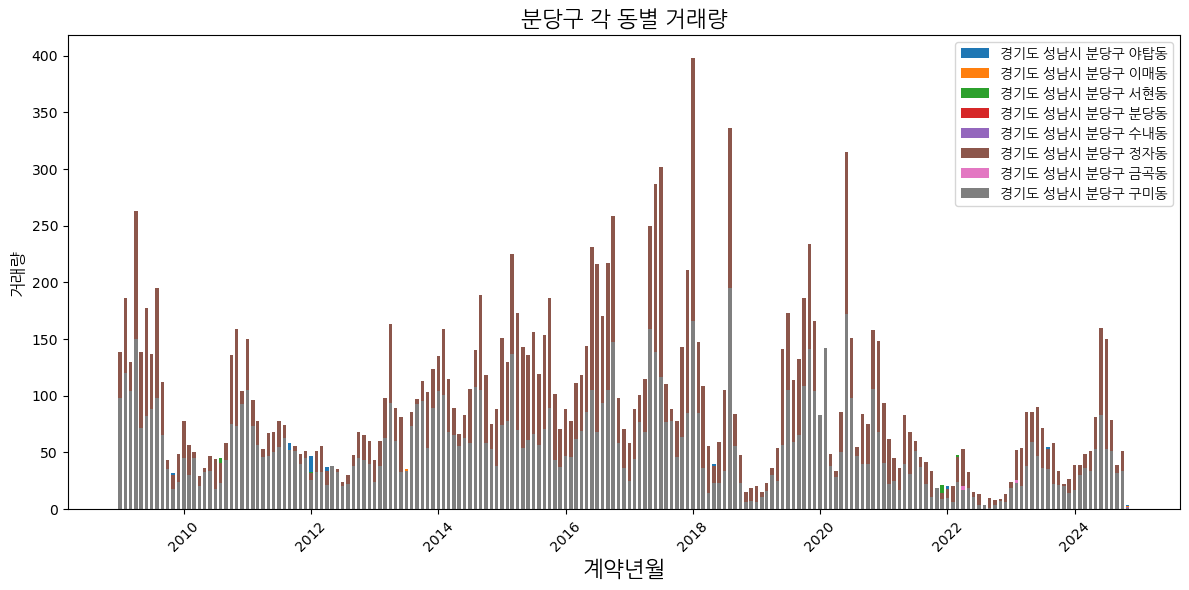

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))

# 각 '시군구'에 대해 막대 그래프 그리기
for 시군구 in target_list:
    data = count_by_bundang[count_by_bundang['시군구'] == 시군구]
    plt.bar(data['계약년월'], data['거래량'], label=시군구, width=20)

# 그래프 꾸미기
plt.xlabel('계약년월', fontproperties=fontprop, fontsize=16)
plt.ylabel('거래량', fontproperties=fontprop, fontsize=12)
plt.title('분당구 각 동별 거래량', fontproperties=fontprop, fontsize=16, loc='center')
plt.legend(prop=fontprop)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()

거래량 총량: 75859


,연도,거래량
0,2009,7208
1,2010,3846
2,2011,4084
3,2012,2601
4,2013,4752


(16, 2)


,시군구,계약년월,거래량,연도
29960,경기도 성남시 분당구 구미동,2009-01-01,98,2009
29961,경기도 성남시 분당구 구미동,2009-02-01,120,2009
29962,경기도 성남시 분당구 구미동,2009-03-01,104,2009
29963,경기도 성남시 분당구 구미동,2009-04-01,150,2009
29964,경기도 성남시 분당구 구미동,2009-05-01,72,2009


(1521, 4)


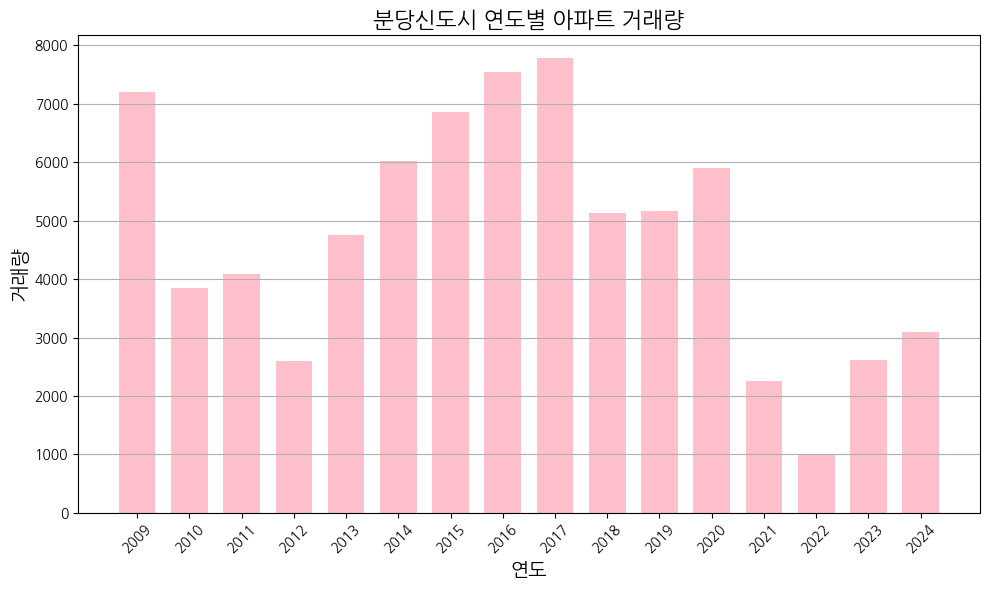

<Figure size 1000x600 with 0 Axes>

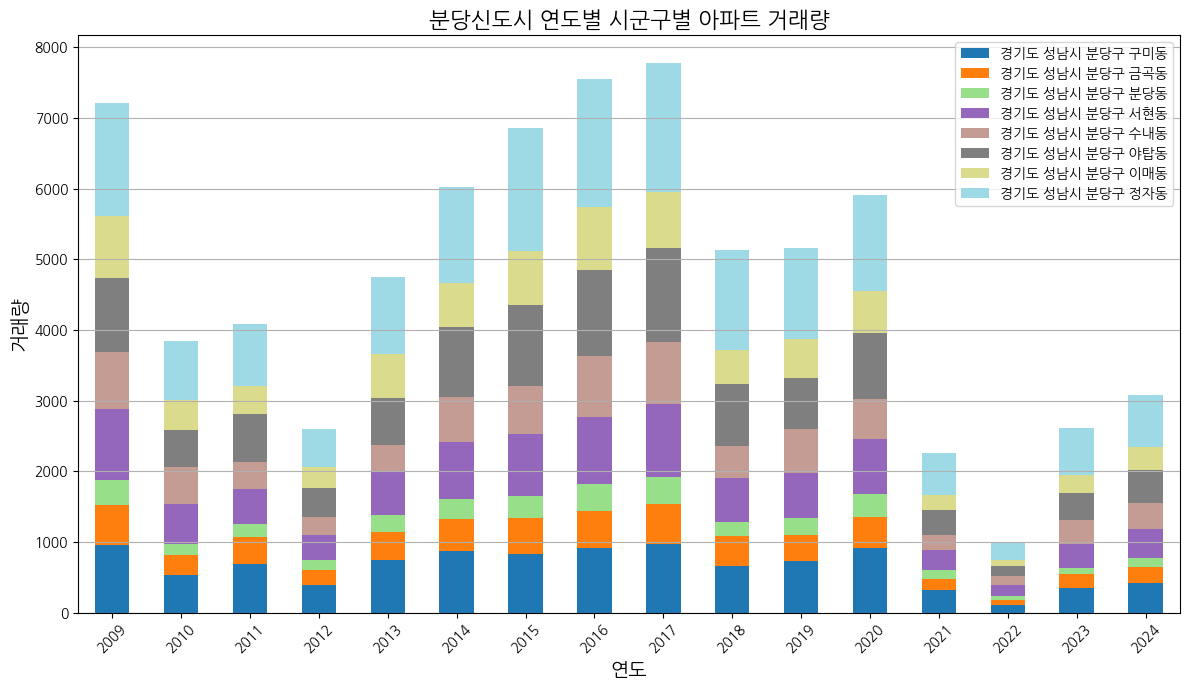

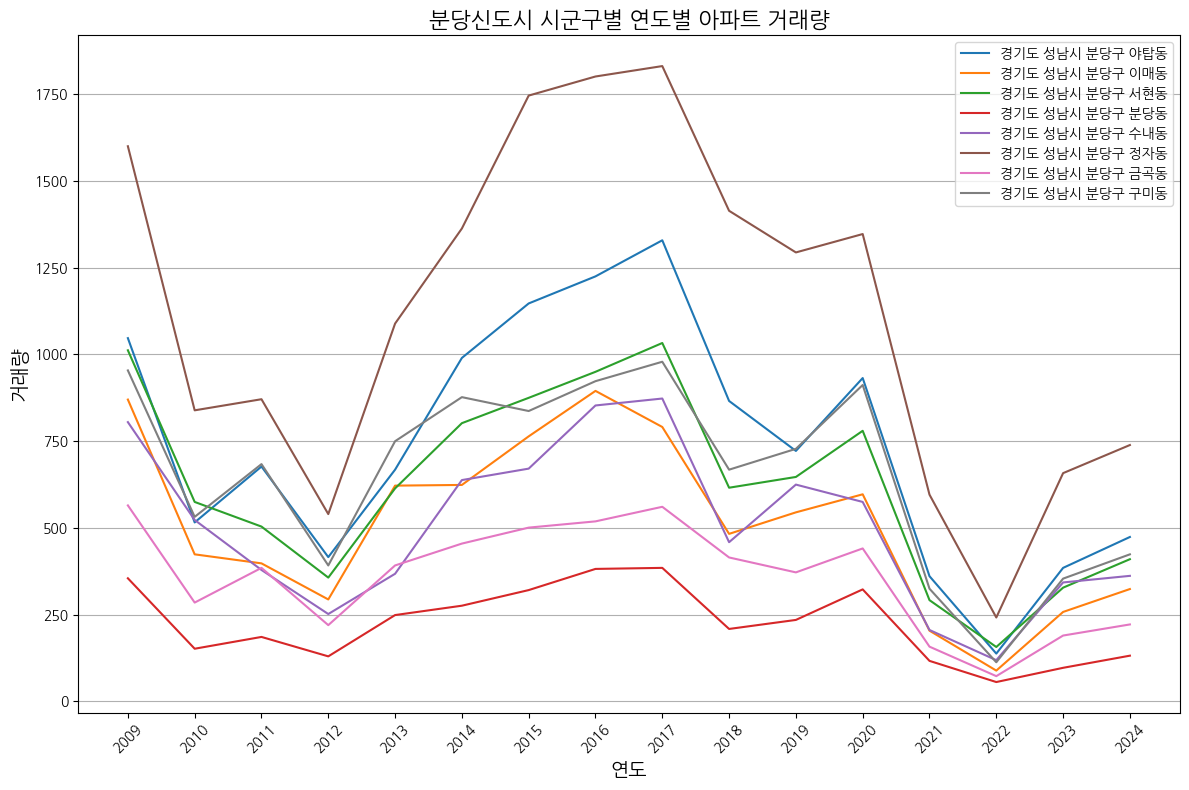

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 폰트 설정 (NanumGothic 사용)
font_path = '/Users/ihyeonglae/NewTownInsight/아파트 실거래가/NanumGothic.ttf'
fontprop = FontProperties(fname=font_path)


# CSV 파일 불러오기
df = pd.read_csv('/Users/ihyeonglae/NewTownInsight/아파트 실거래가/apt_price.csv',
                 encoding='UTF-8',
                 header=0)
df = df.drop(columns=['Unnamed: 0'])

# 필요한 컬럼만 선택
df = df[['시군구', '계약년월', '거래금액(만원)']]

# '계약년월'을 날짜 형식으로 변환
df['계약년월'] = pd.to_datetime(df['계약년월'], format='%Y%m')

# '시군구'와 '계약년월' 별로 그룹화하여 거래 건수 세기
count_by_bundang = df.groupby(['시군구', '계약년월']).size().reset_index(name='거래량')

# 필터링할 지역 리스트 설정
target_list = [ 
    '경기도 성남시 분당구 야탑동',
    '경기도 성남시 분당구 이매동',
    '경기도 성남시 분당구 서현동',
    '경기도 성남시 분당구 분당동',
    '경기도 성남시 분당구 수내동',
    '경기도 성남시 분당구 정자동',
    '경기도 성남시 분당구 금곡동',
    '경기도 성남시 분당구 구미동',
    ]


# target_list에 포함된 데이터만 필터링
count_by_bundang = count_by_bundang[count_by_bundang['시군구'].isin(target_list)]

# 2009년 이후 데이터만 필터링
count_by_bundang = count_by_bundang[count_by_bundang['계약년월'] >= '2009-01-01']

# **거래량 총량 계산**
total_transactions = count_by_bundang['거래량'].sum()
print("거래량 총량:", total_transactions)

# '계약년월'에서 연도 추출하여 '연도' 컬럼 생성
count_by_bundang['연도'] = count_by_bundang['계약년월'].dt.year

# 연도별 그룹화하여 거래량 합계 계산
annual_transactions = count_by_bundang.groupby('연도')['거래량'].sum().reset_index()

# 결과 출력
display(annual_transactions.head())
print(annual_transactions.shape)

# 결과 확인
display(count_by_bundang.head())
print(count_by_bundang.shape)


# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 생성 (연도별 거래량)
plt.bar(annual_transactions['연도'], annual_transactions['거래량'], 
        color='pink', width=0.7)

# 그래프 꾸미기
plt.xlabel('연도', fontproperties=fontprop, fontsize=14)
plt.ylabel('거래량', fontproperties=fontprop, fontsize=14)
plt.title('분당신도시 연도별 아파트 거래량', fontproperties=fontprop, fontsize=16)
plt.xticks(annual_transactions['연도'], fontproperties=fontprop, rotation=45)
plt.yticks(fontproperties=fontprop)
plt.grid(axis='y')  # y축 격자 표시
plt.tight_layout()

# 그래프 출력
plt.show()

# 'pivot_table'로 연도별, 시군구별 거래량 집계
pivot_df = count_by_bundang.pivot_table(index='연도', columns='시군구', values='거래량', aggfunc='sum', fill_value=0)

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 누적 막대 그래프 생성
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

# 그래프 꾸미기
plt.xlabel('연도', fontproperties=fontprop, fontsize=14)
plt.ylabel('거래량', fontproperties=fontprop, fontsize=14)
plt.title('분당신도시 연도별 시군구별 아파트 거래량', fontproperties=fontprop, fontsize=16)
plt.xticks(fontproperties=fontprop, rotation=45)
plt.yticks(fontproperties=fontprop)
plt.legend(prop=fontprop)
plt.grid(axis='y')
plt.tight_layout()

# 그래프 출력
plt.show()

# 시군구별로 개별 그래프 그리기
plt.figure(figsize=(12, 8))

for idx, district in enumerate(target_list):
    district_data = count_by_bundang[count_by_bundang['시군구'] == district]
    annual_data = district_data.groupby('연도')['거래량'].sum().reset_index()

    plt.plot(annual_data['연도'], annual_data['거래량'], label=district)

# 그래프 꾸미기
plt.xlabel('연도', fontproperties=fontprop, fontsize=14)
plt.ylabel('거래량', fontproperties=fontprop, fontsize=14)
plt.title('분당신도시 시군구별 연도별 아파트 거래량', fontproperties=fontprop, fontsize=16)
plt.legend(prop=fontprop)
plt.xticks(annual_transactions['연도'], fontproperties=fontprop, rotation=45)
plt.yticks(fontproperties=fontprop)
plt.grid(axis='y')
plt.tight_layout()

# 그래프 출력
plt.show()


거래량 총량: 104816


,연도,거래량
0,2009,5927
1,2010,3705
2,2011,6580
3,2012,4606
4,2013,8000


(16, 2)


,시군구,계약년월,거래량,연도
3446,경기도 고양시 일산동구 마두동,2009-01-01,44,2009
3447,경기도 고양시 일산동구 마두동,2009-02-01,80,2009
3448,경기도 고양시 일산동구 마두동,2009-03-01,61,2009
3449,경기도 고양시 일산동구 마두동,2009-04-01,147,2009
3450,경기도 고양시 일산동구 마두동,2009-05-01,72,2009


(1715, 4)


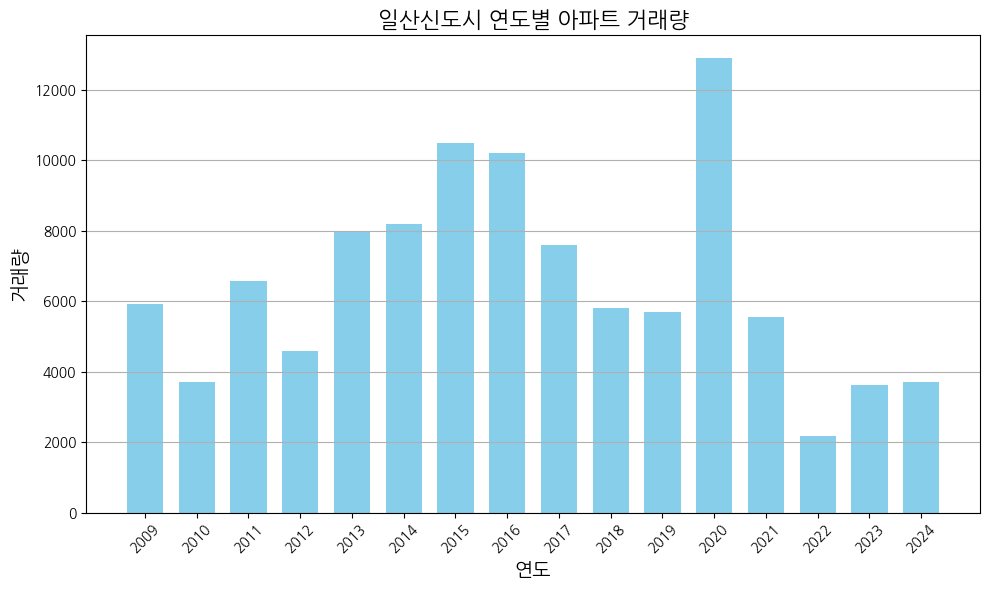

<Figure size 1000x600 with 0 Axes>

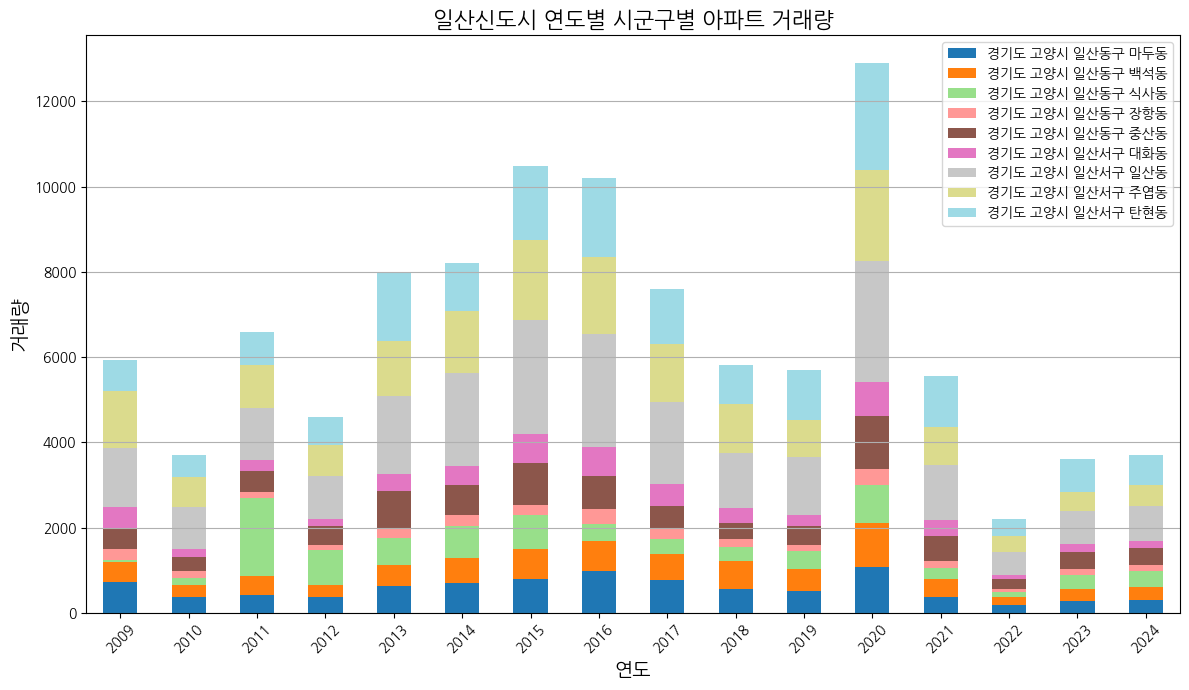

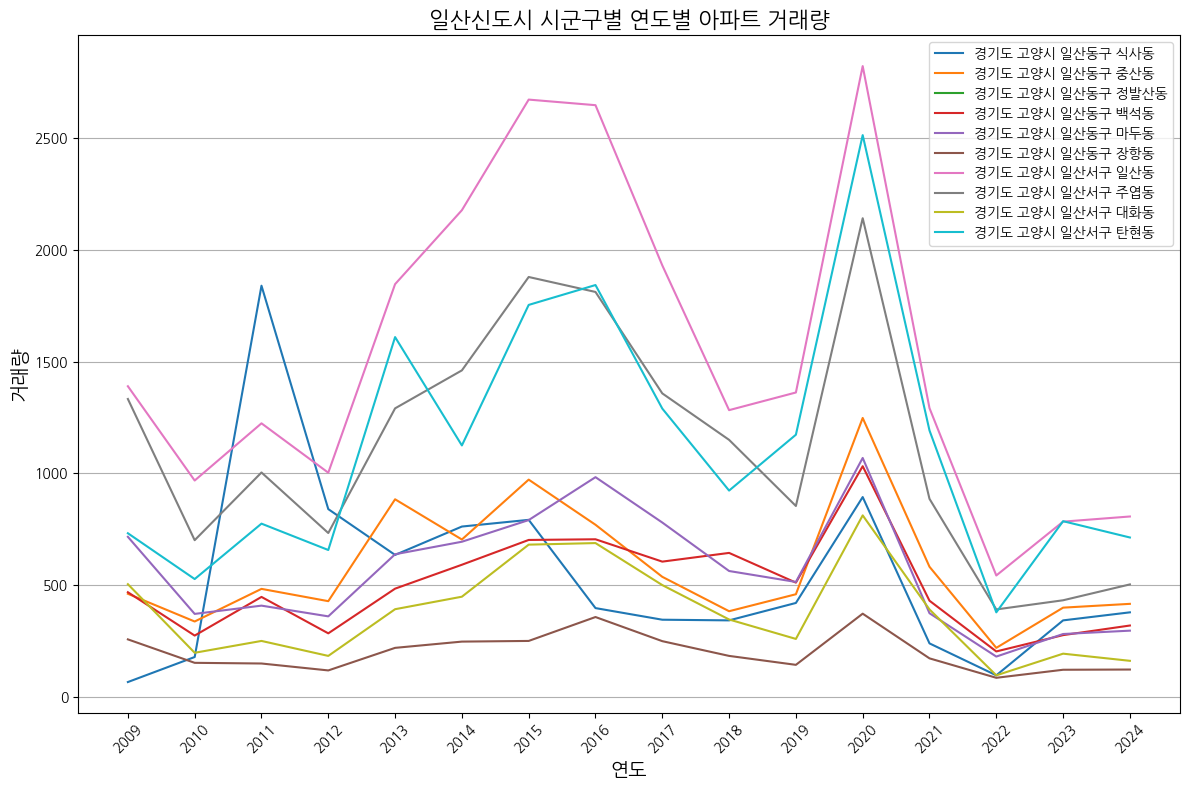

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 폰트 설정 (NanumGothic 사용)
font_path = '/Users/ihyeonglae/NewTownInsight/아파트 실거래가/NanumGothic.ttf'
fontprop = FontProperties(fname=font_path)


# CSV 파일 불러오기
df = pd.read_csv('/Users/ihyeonglae/NewTownInsight/아파트 실거래가/apt_price.csv',
                 encoding='UTF-8',
                 header=0)
df = df.drop(columns=['Unnamed: 0'])

# 필요한 컬럼만 선택
df = df[['시군구', '계약년월', '거래금액(만원)']]

# '계약년월'을 날짜 형식으로 변환
df['계약년월'] = pd.to_datetime(df['계약년월'], format='%Y%m')

# '시군구'와 '계약년월' 별로 그룹화하여 거래 건수 세기
count_by_ilsan = df.groupby(['시군구', '계약년월']).size().reset_index(name='거래량')

# 필터링할 지역 리스트 설정
target_list = [
    '경기도 고양시 일산동구 식사동',
    '경기도 고양시 일산동구 중산동',
    '경기도 고양시 일산동구 정발산동',
    #'경기도 고양시 일산동구 풍산동',
    '경기도 고양시 일산동구 백석동',
    '경기도 고양시 일산동구 마두동',
    '경기도 고양시 일산동구 장항동',
    '경기도 고양시 일산서구 일산동',
    '경기도 고양시 일산서구 주엽동',
    '경기도 고양시 일산서구 대화동',
    '경기도 고양시 일산서구 탄현동'
    ]


# target_list에 포함된 데이터만 필터링
count_by_ilsan = count_by_ilsan[count_by_ilsan['시군구'].isin(target_list)]

# 2009년 이후 데이터만 필터링
count_by_ilsan = count_by_ilsan[count_by_ilsan['계약년월'] >= '2009-01-01']

# **거래량 총량 계산**
total_transactions = count_by_ilsan['거래량'].sum()
print("거래량 총량:", total_transactions)

# '계약년월'에서 연도 추출하여 '연도' 컬럼 생성
count_by_ilsan['연도'] = count_by_ilsan['계약년월'].dt.year

# 연도별 그룹화하여 거래량 합계 계산
annual_transactions = count_by_ilsan.groupby('연도')['거래량'].sum().reset_index()

# 결과 출력
display(annual_transactions.head())
print(annual_transactions.shape)


# 결과 확인
display(count_by_ilsan.head())
print(count_by_ilsan.shape)



# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 생성 (연도별 거래량)
plt.bar(annual_transactions['연도'], annual_transactions['거래량'], 
        color='skyblue', width=0.7)

# 그래프 꾸미기
plt.xlabel('연도', fontproperties=fontprop, fontsize=14)
plt.ylabel('거래량', fontproperties=fontprop, fontsize=14)
plt.title('일산신도시 연도별 아파트 거래량', fontproperties=fontprop, fontsize=16)
plt.xticks(annual_transactions['연도'], fontproperties=fontprop, rotation=45)
plt.yticks(fontproperties=fontprop)
plt.grid(axis='y')  # y축 격자 표시
plt.tight_layout()

# 그래프 출력
plt.show()

# 'pivot_table'로 연도별, 시군구별 거래량 집계
pivot_df = count_by_ilsan.pivot_table(index='연도', columns='시군구', values='거래량', aggfunc='sum', fill_value=0)

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 누적 막대 그래프 생성
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

# 그래프 꾸미기
plt.xlabel('연도', fontproperties=fontprop, fontsize=14)
plt.ylabel('거래량', fontproperties=fontprop, fontsize=14)
plt.title('일산신도시 연도별 시군구별 아파트 거래량', fontproperties=fontprop, fontsize=16)
plt.xticks(fontproperties=fontprop, rotation=45)
plt.yticks(fontproperties=fontprop)
plt.legend(prop=fontprop)
plt.grid(axis='y')
plt.tight_layout()

# 그래프 출력
plt.show()

# 시군구별로 개별 그래프 그리기
plt.figure(figsize=(12, 8))

for idx, district in enumerate(target_list):
    district_data = count_by_ilsan[count_by_ilsan['시군구'] == district]
    annual_data = district_data.groupby('연도')['거래량'].sum().reset_index()

    plt.plot(annual_data['연도'], annual_data['거래량'], label=district)

# 그래프 꾸미기
plt.xlabel('연도', fontproperties=fontprop, fontsize=14)
plt.ylabel('거래량', fontproperties=fontprop, fontsize=14)
plt.title('일산신도시 시군구별 연도별 아파트 거래량', fontproperties=fontprop, fontsize=16)
plt.legend(prop=fontprop)
plt.xticks(annual_transactions['연도'], fontproperties=fontprop, rotation=45)
plt.yticks(fontproperties=fontprop)
plt.grid(axis='y')
plt.tight_layout()

# 그래프 출력
plt.show()


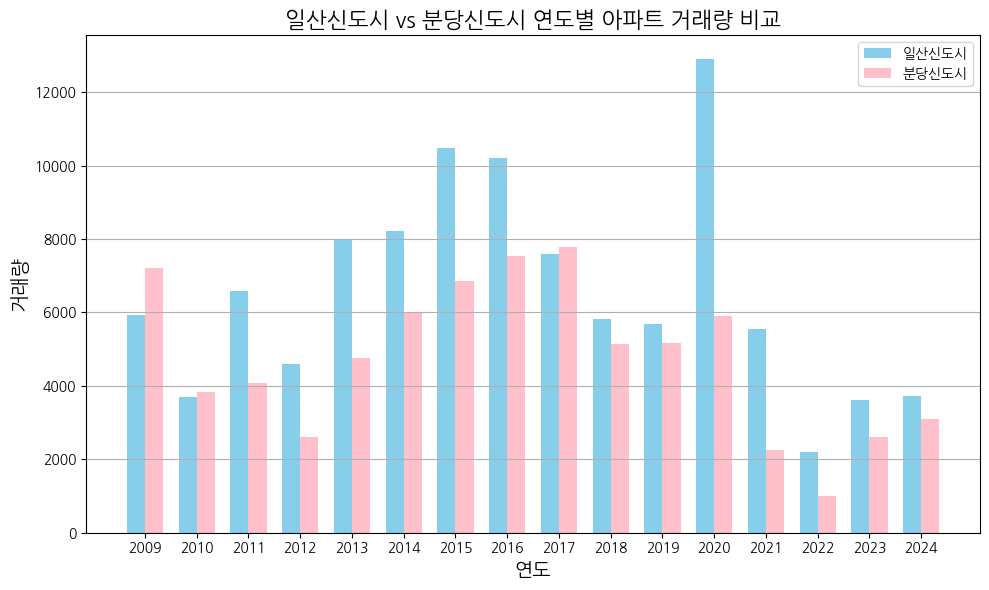

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 폰트 설정 (NanumGothic 사용)
font_path = '/Users/ihyeonglae/NewTownInsight/아파트 실거래가/NanumGothic.ttf'
fontprop = FontProperties(fname=font_path)

# CSV 파일 불러오기
df = pd.read_csv('/Users/ihyeonglae/NewTownInsight/아파트 실거래가/apt_price.csv',
                 encoding='UTF-8', header=0)
df = df.drop(columns=['Unnamed: 0'])

# 필요한 컬럼만 선택
df = df[['시군구', '계약년월', '거래금액(만원)']]

# '계약년월'을 날짜 형식으로 변환
df['계약년월'] = pd.to_datetime(df['계약년월'], format='%Y%m')

# 거래량 계산 함수 정의
def filter_and_group_data(df, target_list):
    # 필터링
    filtered_df = df[df['시군구'].isin(target_list)]
    filtered_df = filtered_df[filtered_df['계약년월'] >= '2009-01-01']
    
    # **거래 건수(거래량) 추가**
    filtered_df['거래량'] = 1  # 각 행을 1건으로 설정
    
    # 연도별로 그룹화하여 거래량 계산
    filtered_df['연도'] = filtered_df['계약년월'].dt.year
    return filtered_df.groupby('연도')['거래량'].sum().reset_index()

# 필터링할 지역 리스트 (일산 및 분당)
ilsan_list = [
    '경기도 고양시 일산동구 식사동', '경기도 고양시 일산동구 중산동', '경기도 고양시 일산동구 정발산동',
    '경기도 고양시 일산동구 백석동', '경기도 고양시 일산동구 마두동', '경기도 고양시 일산동구 장항동',
    '경기도 고양시 일산서구 일산동', '경기도 고양시 일산서구 주엽동', '경기도 고양시 일산서구 대화동',
    '경기도 고양시 일산서구 탄현동'
]
bundang_list = [
    '경기도 성남시 분당구 야탑동', '경기도 성남시 분당구 이매동', '경기도 성남시 분당구 서현동',
    '경기도 성남시 분당구 분당동', '경기도 성남시 분당구 수내동', '경기도 성남시 분당구 정자동',
    '경기도 성남시 분당구 금곡동', '경기도 성남시 분당구 구미동'
]

# 데이터 필터링 및 그룹화
count_by_ilsan = filter_and_group_data(df, ilsan_list)
count_by_bundang = filter_and_group_data(df, bundang_list)

# 그래프 병합
plt.figure(figsize=(10, 6))

# 막대 그래프 생성 (나란히 표시)
width = 0.35
x = range(len(count_by_ilsan))

plt.bar(x, count_by_ilsan['거래량'], width, label='일산신도시', color='skyblue')
plt.bar([i + width for i in x], count_by_bundang['거래량'], width, label='분당신도시', color='pink')

# 그래프 꾸미기
plt.xlabel('연도', fontproperties=fontprop, fontsize=14)
plt.ylabel('거래량', fontproperties=fontprop, fontsize=14)
plt.title('일산신도시 vs 분당신도시 연도별 아파트 거래량 비교', fontproperties=fontprop, fontsize=16)
plt.xticks([i + width / 2 for i in x], count_by_ilsan['연도'], fontproperties=fontprop)
plt.yticks(fontproperties=fontprop)
plt.legend(prop=fontprop)
plt.grid(axis='y')
plt.tight_layout()

# 그래프 출력
plt.show()
